## Project : Holt-Winters Exponential Smoothing Forecast 
                                                                                                          - Neil Joshi
                                                                                                            Industrial Engg
                                                                                                            001466073

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
import datetime as dt

In [2]:
#reading the excel dowloaded from online resources

df = pd.read_csv("D:\Grad Study\Computation Modelling\Project\Retail Sales Used car dealers.csv", 
                 header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
df.index.freq = 'MS'

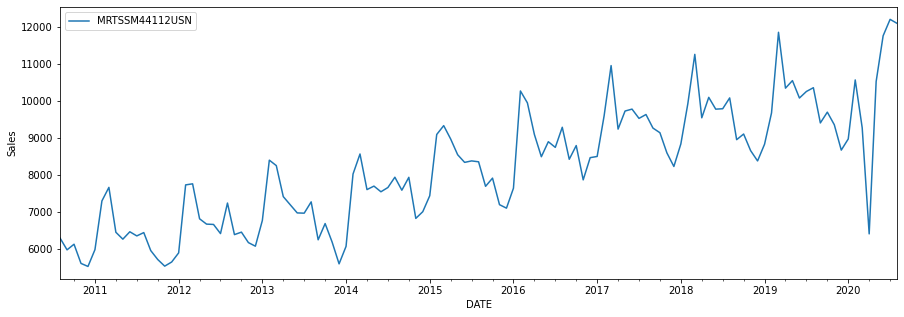

In [3]:
#plot of the given dataset Time vs Sales

df.plot(figsize = (15,5))
plt.ylabel('Sales')
plt.show()

In [4]:
#splitting between the training and the test data sets. Testing 

df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

In [5]:
#building and training the model on the training data

model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit(optimized=True)

C:\Users\damoo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\damoo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [6]:
#printing out the summary for the fitted model

print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  109
Model:             ExponentialSmoothing   SSE                       11890589.482
Optimized:                         True   AIC                           1296.390
Trend:                         Additive   BIC                           1339.452
Seasonal:                Multiplicative   AICC                          1303.990
Seasonal Periods:                    12   Date:                 Mon, 07 Dec 2020
Box-Cox:                          False   Time:                         11:57:42
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2422404                alpha                 True
smoothing_slope          

In [7]:
#create a forecast sample for next 12 steps on trained dataset model

sales_forecast = fitted.forecast(steps=12)

<Figure size 432x288 with 0 Axes>

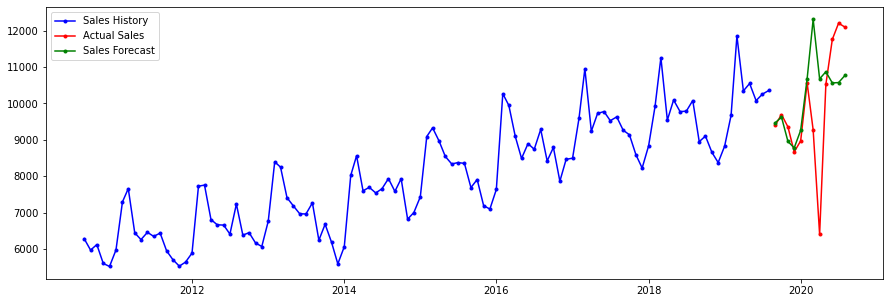

In [8]:
#plot the training data, the test data and the forecast on the same plot
fig = plt.figure()
plt.figure(figsize=(15, 5))
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

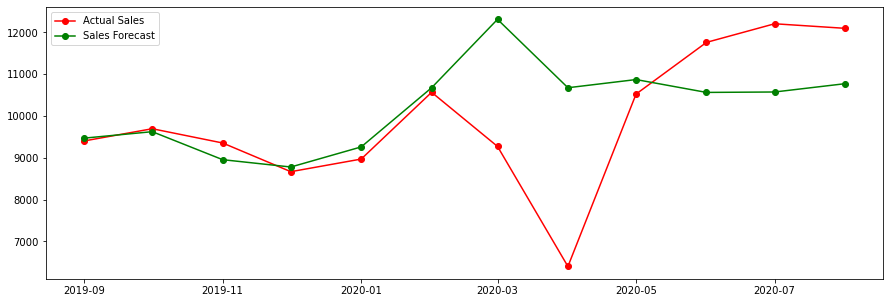

In [9]:
#Zoomed in version to show the deviation from actual sales to forecasted sales.
plt.figure(figsize=(15, 5))
ax = plt.subplot()
actual, = ax.plot(df_test.index, df_test, 'ro-', label='Actual Sales')
forecast, = ax.plot(df_test.index, sales_forecast, 'go-', label='Sales Forecast')
plt.legend()

In [10]:
sales_predicted = sales_forecast.values.reshape(-1,1)

In [11]:
sales_actual = df_test.values
df_test['predicted'] = sales_predicted

<ipython-input-11-b16e412cd81b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = sales_predicted


In [12]:
df_test.reset_index(inplace = True)

In [13]:
df_test['year'] = df_test['DATE'].dt.year

<ipython-input-13-9df28a9af7a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['year'] = df_test['DATE'].dt.year


In [14]:
df_test.groupby('year').describe()

MRTSSM44112USN                                                            \
              count       mean          std     min     25%      50%      75%   
year                                                                            
2019            4.0   9281.000   434.884659  8669.0  9183.5   9379.5   9477.0   
2020            8.0  10225.375  1966.923191  6403.0  9197.5  10546.0  11845.0   

              predicted                                                       \
          max     count          mean         std          min           25%   
year                                                                           
2019   9696.0       4.0   9208.311258  403.966604  8780.703000   8912.200434   
2020  12206.0       8.0  10713.757385  822.428819  9261.553829  10572.062724   

                                                
               50%           75%           max  
year                                            
2019   9213.493112   9509.603936   9625.555811  
2020  10676.518740  10797.746902  12311.530948

In [17]:
values = (sales_predicted - sales_actual)
values[6:]

array([[ 3038.53094797],
       [ 4273.34162869],
       [  346.86335385],
       [-1196.57736821],
       [-1631.39057869],
       [-1323.95858158]])